In [1]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the fashion MNIST dataset
(x_train, _), (_, _) = keras.datasets.fashion_mnist.load_data()

# Normalise the data
x_train = x_train / 255.0

# Add an extra dimension
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)


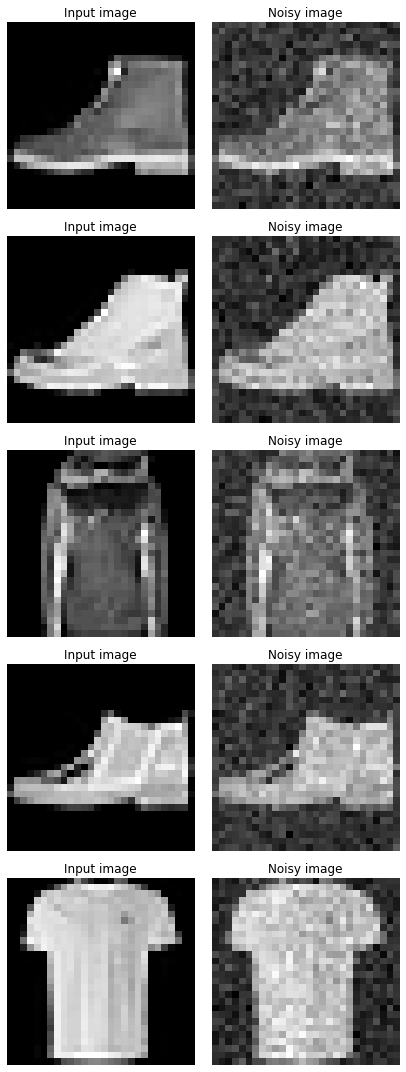

In [3]:
# Add noise to our data
x_train_noise = [x + np.random.normal(loc=0, scale=0.1, size=x.shape) for x in x_train]
x_train_noise = np.array(x_train_noise)

id = np.random.randint(low = 0, high = x_train.shape[0], size = 5)

# Plot a few examples
fig, ax = plt.subplots(5, 2, figsize=(6, 15))

for i in range(5):
    ax[i, 0].imshow(x_train[id[i], :, :, 0], cmap='gray')
    ax[i, 0].set_title('Input image')
    ax[i, 1].imshow(x_train_noise[id[i], :, :, 0], cmap='gray')
    ax[i, 1].set_title('Noisy image')

for a in ax.ravel():
    a.axis("off")

plt.tight_layout()

In [4]:
# Create a convolutional autoencoder

model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))

# Encoder
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=2))

# Decoder
model.add(keras.layers.UpSampling2D())
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D())
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

We now create a simple helper function to show the results of our model predictions. We can test it immediately, but since we have not done any training we are likely to simply get rubbish!

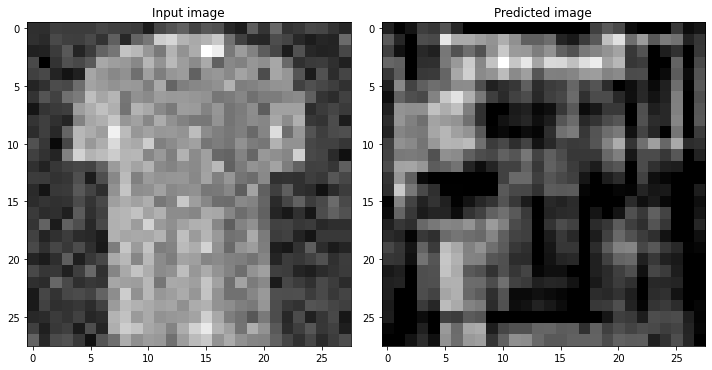

In [5]:
def show_prediction(img, model):
    """Shows the predicted output of the model

    Args:
        img: The input image
        model: The Keras model
    """

    # Predict the image
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the image
    ax[0].imshow(img[0, :, :, 0], cmap='gray')
    ax[0].set_title('Input image')
    # Plot the predicted image
    ax[1].imshow(prediction[0, :, :, 0], cmap='gray')
    ax[1].set_title('Predicted image')
    plt.tight_layout()

id = np.random.randint(low = 0, high = x_train.shape[0])
show_prediction(x_train_noise[id], model)

In [6]:
history = model.fit(x_train_noise, x_train, 
        validation_split=0.2,
        epochs=15,
        batch_size=256)

Epoch 1/15
188/188 [==============================] - 10s 46ms/step - loss: 0.0257 - val_loss: 0.0119
Epoch 2/15
188/188 [==============================] - 8s 42ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 3/15
188/188 [==============================] - 8s 42ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 4/15
188/188 [==============================] - 9s 46ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 5/15
188/188 [==============================] - 8s 42ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 6/15
188/188 [==============================] - 8s 42ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 7/15
188/188 [==============================] - 8s 42ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 8/15
188/188 [==============================] - 8s 43ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 9/15
188/188 [==============================] - 8s 42ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 10/15
188/188 [==============================] - 8s 42ms/step - loss: 0.0049 - val_l

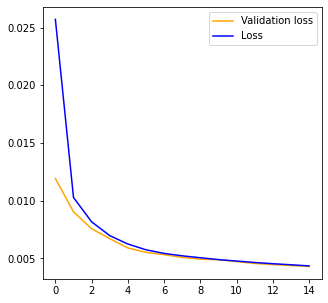

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.plot(history.history['val_loss'], color="orange", label="Validation loss")
ax.plot(history.history['loss'], color="blue", label="Loss")
ax.legend()
plt.show()

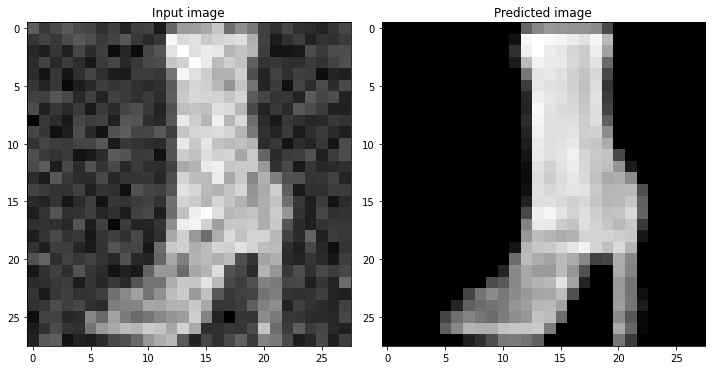

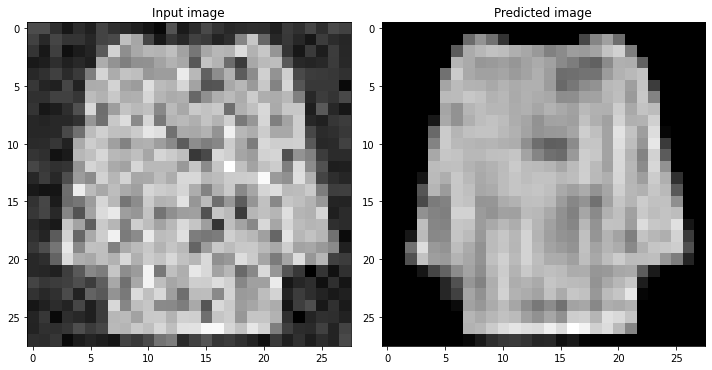

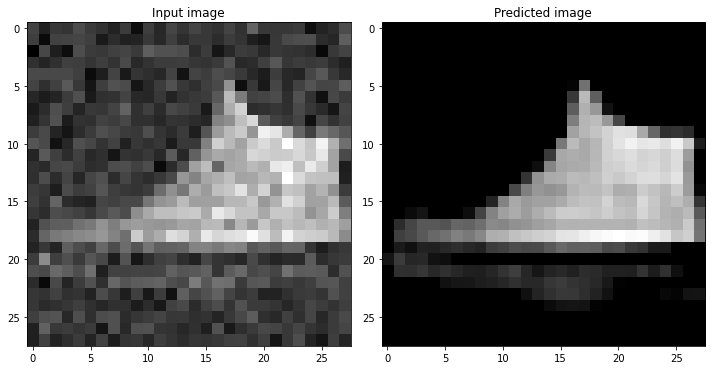

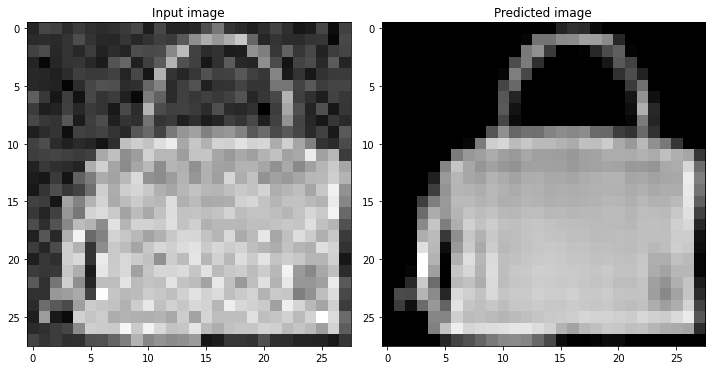

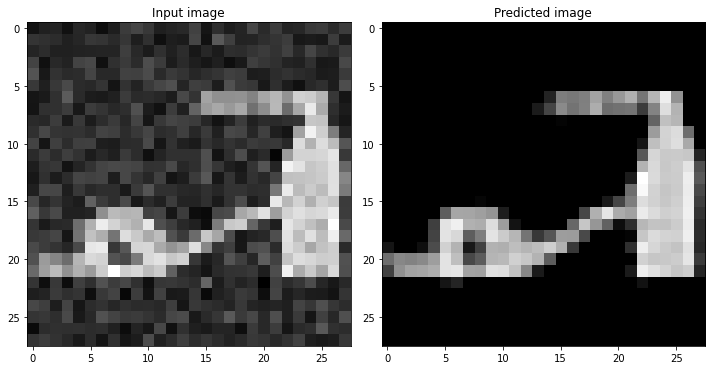

In [8]:
id = np.random.randint(low = 0, high = x_train.shape[0], size = 5)

for i in id:
    show_prediction(x_train_noise[i], model)